<a href="https://colab.research.google.com/github/eze-hong/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EC%B6%9C%EC%84%9D%EA%B3%BC%EC%A0%9C_%ED%99%8D%EC%9D%B4%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-2

1.   Python을 사용하여 API를 호출하는 코드를 작성
2.   2015년 1월부터 2024년 12월까지의 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램을 작성
3. API 호출 성공을 확인할 수 있는 실행 결과를 캡처하여 첨부


In [ ]:
import requests
import json
import pandas as pd
import numpy as np

url = 'http://openapi.seoul.go.kr:8088/626b6c4a5873656f36336e756f4b6f/json/energyUseDataSummaryInfo/1/5/'

params = {
    'KEY' : '626b6c4a5873656f36336e756f4b6f',
    'TYPE' : 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX' : '1',
    'END_INDEX' : '100',
}
## 데이터 수집
response = requests.get(url, params=params)

data = response.json()['energyUseDataSummaryInfo'] ##['row']
##df = pd.DataFrame(data)
print(data)
##print(data['RESULT']['CODE'])

{'list_total_count': 1241, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2025', 'MON': '06', 'MM_TYPE': '개인', 'CNT': '1269454', 'EUS': '278745288', 'EUS1': '275851011', 'EUS2': '273151435', 'ECO2_1': '4244065', 'ECO2_2': '2076623.656', 'GUS': '13084768', 'GUS1': '11889039', 'GUS2': '12094650', 'GCO2_1': '1091102', 'GCO2_2': '2182204', 'WUS': '14927683.6', 'WUS1': '15166284.8', 'WUS2': '15371662.2', 'WCO2_1': '-341289.9', 'WCO2_2': '-611822.446', 'HUS': '379182.22', 'HUS1': '368839.049', 'HUS2': '389847.167', 'HCO2_1': '-160.888', 'HCO2_2': '-22448.67848156', 'REG_DATE': '2025-09-01 04:02:15.0'}, {'YEAR': '2025', 'MON': '06', 'MM_TYPE': '학교', 'CNT': '6745', 'EUS': '117808793', 'EUS1': '114793127', 'EUS2': '114623246', 'ECO2_1': '3100606.5', 'ECO2_2': '3096973.668', 'GUS': '2093441', 'GUS1': '2046804', 'GUS2': '2061648', 'GCO2_1': '39207', 'GCO2_2': '78414', 'WUS': '1824338.2', 'WUS1': '1914804.2', 'WUS2': '1956560.2', 'WCO2_1': '-111344', 'WCO2_2': '-333633.

In [1]:
import requests
import json
import pandas as pd
import numpy as np

url = 'http://openapi.seoul.go.kr:8088/626b6c4a5873656f36336e756f4b6f/json/energyUseDataSummaryInfo/1/5/'

params = {
    'KEY' : '626b6c4a5873656f36336e756f4b6f',
    'TYPE' : 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX' : '1',
    'END_INDEX' : '100',
}
## 데이터 수집



def get_year_months():
  year_months = []
  for year in range(2015, 2016+1):
    ##for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

responses = []

for year_month in get_year_months():
    year = year_month[:4]
    mon = year_month[4:]
    url = f'http://openapi.seoul.go.kr:8088/626b6c4a5873656f36336e756f4b6f/json/energyUseDataSummaryInfo/1/5/{year}/{mon}'
    response = requests.get(url, params=params)
    data = response.json().get('energyUseDataSummaryInfo', {})
    result = data.get('RESULT', {})

    if result.get('CODE') == 'INFO-000' :
    ##if data['RESULT']['CODE'] == 'INFO-000' :
        ##rows =  data['row']
        rows = data.get('row', [])
        개인_row = [r for r in rows if r['MM_TYPE'] == '개인']
        if(len(개인_row)!=0) :
            ##print([{'YEAR': d['YEAR'], 'MON' : d['MON'], 'MM_TYPE' : d['MM_TYPE'], 'EUS' : d['EUS'], 'GUS' : d['GUS'], 'WUS' : d['WUS'], 'HUS' : d['HUS']} for d in 개인_row])
            responses.append([{'YEAR': d['YEAR'], 'MON' : d['MON'], 'MM_TYPE' : d['MM_TYPE'], 'EUS' : d['EUS'], 'GUS' : d['GUS'], 'WUS' : d['WUS'], 'HUS' : d['HUS']} for d in 개인_row])

print(responses)

if(len(responses)!=0):
    print("api 호출 성공")
else :
    print("api 호출 실패")

[[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}], [{'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}], [{'YEAR': '2015', 'MON': '05', 'MM_TYPE': '개인', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}], [{'YEAR': '2015', 'MON': '06', 'MM_TYPE': '개인', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}], [{'YEAR': '2015', 'MON': '07', 'MM_TYPE': '개인', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}], [{'YEAR': '2015', 'MON': '08', 'MM_TYPE': '개인', 'EUS': '242000479', 'GUS': '7619018', 'WUS': '15164553.742', 'HUS': '460288.965'}], [{'YEAR': '2015', 'MON': '10', 'MM_TYPE': '개인', 'EUS': '186473958', 'GUS': '8924018', 'WUS': '14711828.766', 'HUS': '3167520.127'}], [{'YEAR': '2015', 'MON': '12', 'MM_TYPE': '개인', 'EUS': '203388142

In [ ]:
original_list = [
    {'name': 'Alice', 'age': 30, 'city': 'New York'},
    {'name': 'Bob', 'age': 24, 'city': 'London'},
    {'name': 'Charlie', 'age': 35, 'city': 'Paris'}
]

# Extract 'name' and 'city'
new_list = [{'name': d['name'], 'city': d['city']} for d in original_list] ##this called 'List Comprehension'
print(new_list)

[{'name': 'Alice', 'city': 'New York'}, {'name': 'Bob', 'city': 'London'}, {'name': 'Charlie', 'city': 'Paris'}]


문제 2
1. 수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력 하는 코드와 실행 결과를 첨부
2. 연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하 는 전처리 코드를 작성하고, 변환 결과를 확인할 수 있는 출력 결과를 첨부하시오.
※ 계절 구분: 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월)

In [2]:
import numpy as np
# print("type:")
# print(type(responses))
# print("len:")
# print(len(responses))
# print(type(responses[0]))
# print(responses[0][:2])
# df = pd.DataFrame(responses[0])
# df.info()
# df.head()
# print("::::::columns::::::")
# print(df.columns)

##print(df.values.tolist())

##print(df.values.flatten())

flat_responses = [d for sublist in responses for d in sublist]
df = pd.DataFrame(flat_responses)
print("df 출력")
print(df)
df.describe(include='all')
##df.describe(include=[np.number])

def getSeason(x) :
    mon = int(x['MON'])
    if 3<= mon <=5 : return 'Spring'
    elif 6<= mon <=8 : return 'Summer'
    elif 9<= mon <=11 : return 'Autumn'
    else : return 'WInter'

df['SEASON'] = df.apply(getSeason, axis=1)
print(df[['YEAR', 'MON', 'SEASON']])

#for d in responses:
#    d['SEASON'] = getSeason(d)
##df['SEASON'] = df['MON'].apply(lambda mon : getSeason ({MON : mon})) ##7강 참
##df['SEASON'] = df[0].apply(lambda row: getSeason({'MON': row[0]['MON']}))
##def setSeason(month) : df['SEASON'] = getSeason(df['MON'])

##dfseason = [setSeason(['MON']) for MON in df]

##print(df.values.flatten())

df 출력
    YEAR MON MM_TYPE        EUS       GUS           WUS           HUS
0   2015  01      개인  193784708  59133720  12819757.886  22740838.937
1   2015  02      개인  189974230  56487358  12656888.218  18793320.213
2   2015  05      개인  177289769  22060892  13086734.214   1320895.801
3   2015  06      개인  186073153  12677645  14241651.402    294312.634
4   2015  07      개인  165114568   8893640  12083879.038    702863.645
5   2015  08      개인  242000479   7619018  15164553.742    460288.965
6   2015  10      개인  186473958   8924018  14711828.766   3167520.127
7   2015  12      개인  203388142  40095231  13904162.958  21102616.717
8   2016  01      개인  215330620  57641741  13218916.436  27186166.133
9   2016  02      개인  216677664  68879796  13312113.622  21452994.715
10  2016  03      개인  203451798  60019600  13191615.499  14070182.978
11  2016  04      개인  202541336  40370608  13748935.736   4556396.936
12  2016  05      개인  195448592  23077064  13762618.524   1166907.615
13  2016  06  

문제 3
1. 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화하고, 그래프에 자신의 학번 뒤 4자리를 제목에 포함하여 저장하시오. (예: "연도별 에너지 사용 총액 변 화 - 1234") 시각화 코드와 생성된 그래프를 첨부하시오.
2. 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시하시 오. 시각화 코드와 생성된 그래프를 첨부하시오.

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and direc

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
##위 둘 실행하고 세션다시

Index(['YEAR', 'MON', 'MM_TYPE', 'EUS', 'GUS', 'WUS', 'HUS', 'SEASON', 'SUM'], dtype='object')
    YEAR MON MM_TYPE        EUS       GUS           WUS           HUS  SEASON  \
0   2015  01      개인  193784708  59133720  12819757.886  22740838.937  WInter   
1   2015  02      개인  189974230  56487358  12656888.218  18793320.213  WInter   
2   2015  05      개인  177289769  22060892  13086734.214   1320895.801  Spring   
3   2015  06      개인  186073153  12677645  14241651.402    294312.634  Summer   
4   2015  07      개인  165114568   8893640  12083879.038    702863.645  Summer   
5   2015  08      개인  242000479   7619018  15164553.742    460288.965  Summer   
6   2015  10      개인  186473958   8924018  14711828.766   3167520.127  Autumn   
7   2015  12      개인  203388142  40095231  13904162.958  21102616.717  WInter   
8   2016  01      개인  215330620  57641741  13218916.436  27186166.133  WInter   
9   2016  02      개인  216677664  68879796  13312113.622  21452994.715  WInter   
10  2016  03  

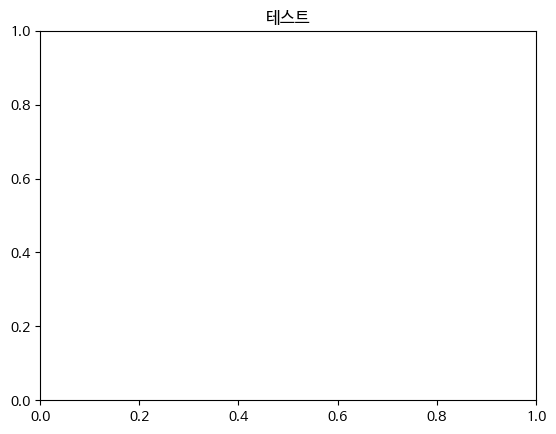

TypeError: unhashable type: 'numpy.ndarray'

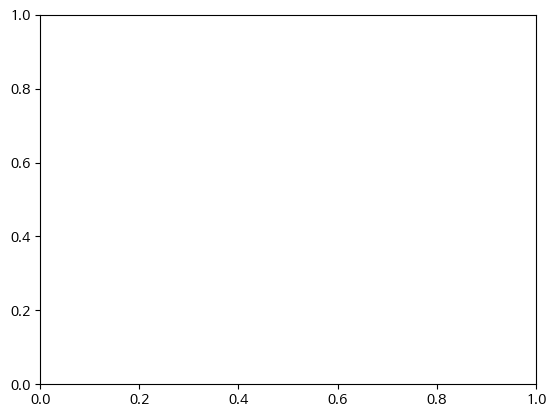

In [15]:
##선그래프
print(df.columns)
df['SUM'] = df[['EUS', 'GUS']].sum(axis=1)
print(df)

plt.title("테스트")
plt.show()

plt.plot(df)

문제 4
1. 연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분석하고, 그 원인을 추론하여 200자 이내로 설명하시오.